In [2]:
import tensorflow as tf
import numpy as np

In [3]:
# 7.1 SimpleRNN 레이어 생성 코드
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)

In [4]:
# 7.2 시퀀스 예측 데이터 생성
X = []
Y = []
for i in range(6):
    # [0,1,2,3], [1,2,3,4] 같은 정수의 시퀀스를 만듭니다.
    lst = list(range(i,i+4))

    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다.
    # SimpleRNN 에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다.
    X.append(list(map(lambda c: [c/10], lst)))

    # 정답에 해당하는 4, 5 등의 정수를 역시 위처럼 10으로 나눠서 저장합니다.
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [5]:
# 7.3 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 7.4 네트워크 훈련 및 결과 확인
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.3495787 ]
 [0.5264076 ]
 [0.65786314]
 [0.74338144]
 [0.788827  ]
 [0.8022073 ]]


In [7]:
# 7.5 학습되지 않은 시퀀스에 대한 예측 결과
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

[[0.7912071]]
[[0.13882202]]


In [8]:
# 7.6 곱셈 문제 데이터 생성
X = []
Y = []
for i in range(3000):
    # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
    lst = np.random.rand(100)
    # 마킹할 숫자 2개의 인덱스를 뽑습니다.
    idx = np.random.choice(100, 2, replace=False)
    # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X 에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    # 마킹 인덱스가 1인 값들만 서로 곱해서 Y 에 저장합니다.
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.         0.46567689]
 [0.         0.84158534]
 [0.         0.69936495]
 [0.         0.24653426]
 [0.         0.66962343]
 [0.         0.83667793]
 [0.         0.34365394]
 [0.         0.09529412]
 [0.         0.21820448]
 [0.         0.81843304]
 [0.         0.65574531]
 [0.         0.07641501]
 [0.         0.78145247]
 [0.         0.66000605]
 [0.         0.99245126]
 [0.         0.88901471]
 [0.         0.42037093]
 [0.         0.6358847 ]
 [0.         0.80034558]
 [0.         0.6620595 ]
 [0.         0.36448852]
 [0.         0.0146234 ]
 [0.         0.89012541]
 [0.         0.24552949]
 [0.         0.79616374]
 [0.         0.36033974]
 [0.         0.39802097]
 [0.         0.60450572]
 [0.         0.53244548]
 [0.         0.39785162]
 [0.         0.56928637]
 [0.         0.15156371]
 [0.         0.16779198]
 [0.         0.88984759]
 [0.         0.42102233]
 [0.         0.91127513]
 [0.         0.47919177]
 [0.         0.18959286]
 [0.         0.9806504 ]
 [0.         0.70155338]


In [9]:
# 7.7 SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 7.8 SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 10s 5ms/sample - loss: 0.0701 - val_loss: 0.0508
Epoch 2/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0488 - val_loss: 0.0496
Epoch 3/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0469 - val_loss: 0.0493
Epoch 4/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0512 - val_loss: 0.0487
Epoch 5/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0473 - val_loss: 0.0486
Epoch 6/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0479 - val_loss: 0.0487
Epoch 7/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0475 - val_loss: 0.0485
Epoch 8/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0470 - val_loss: 0.0511
Epoch 9/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0485 - val_loss: 0.0521
Epoch 1

Epoch 78/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0352 - val_loss: 0.0594
Epoch 79/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0354 - val_loss: 0.0577
Epoch 80/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0342 - val_loss: 0.0619
Epoch 81/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0346 - val_loss: 0.0600
Epoch 82/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0343 - val_loss: 0.0647
Epoch 83/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0345 - val_loss: 0.0597
Epoch 84/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0332 - val_loss: 0.0605
Epoch 85/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0328 - val_loss: 0.0618
Epoch 86/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0331 - val_loss: 0.0632
Epoch 87/100
2048/2048 [======================

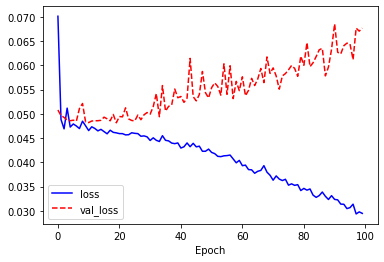

In [12]:
# 7.9 SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [13]:
# 7.10 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

440/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.24063509116083537 	 0.42730445 	diff: 0.18666935553639974
0.026515383796123372 	 0.40212587 	diff: 0.37561048142490017
0.027100423012126576 	 0.29355055 	diff: 0.266450127925526
0.11589036024179875 	 0.28220505 	diff: 0.16631468498143734
0.36309363378480697 	 0.19267161 	diff: 0.170422021879709
correctness: 9.318181818181818 %


In [14]:
# 7.11 LSTM 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.12 LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 26s 13ms/sample - loss: 0.0518 - val_loss: 0.0484
Epoch 2/100
  32/2048 [..............................] - ETA: 14s - loss: 0.0257

In [ ]:
# 7.13 LSTM 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()